In [185]:
!pip install pandas
!pip  install numpy
!pip install seaborn


In [186]:
!pip install matplotlib

In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(10,10)

In [188]:
data = pd.read_csv(r'C:\Users\KR. ARMAAN\Desktop\Python\STROKE DETECTION\data.csv')

In [189]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [190]:
data.shape

(5110, 12)

# EXPLoratory data analysis

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [192]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Lets fill NUll Value

In [193]:
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.7    37
26.1    37
        ..
13.9     1
49.9     1
40.6     1
52.3     1
44.1     1
Name: bmi, Length: 418, dtype: int64

In [194]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [195]:
data['bmi'].fillna(data['bmi'].mean())

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [196]:
data['bmi']

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [197]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)   #inplace in true to reflect in original data frame

In [198]:
data['bmi']

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [199]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# ID is USELSSS , DROPPING ID

In [200]:
data.drop('id',axis=1,inplace =True)    # axis =1 from column  if drop row then axis = 0

In [201]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# outlier Remmoval

In [202]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16,20),dpi=800,facecolor='w',edgecolor='k')

<Figure size 12800x16000 with 0 Axes>

<Figure size 12800x16000 with 0 Axes>

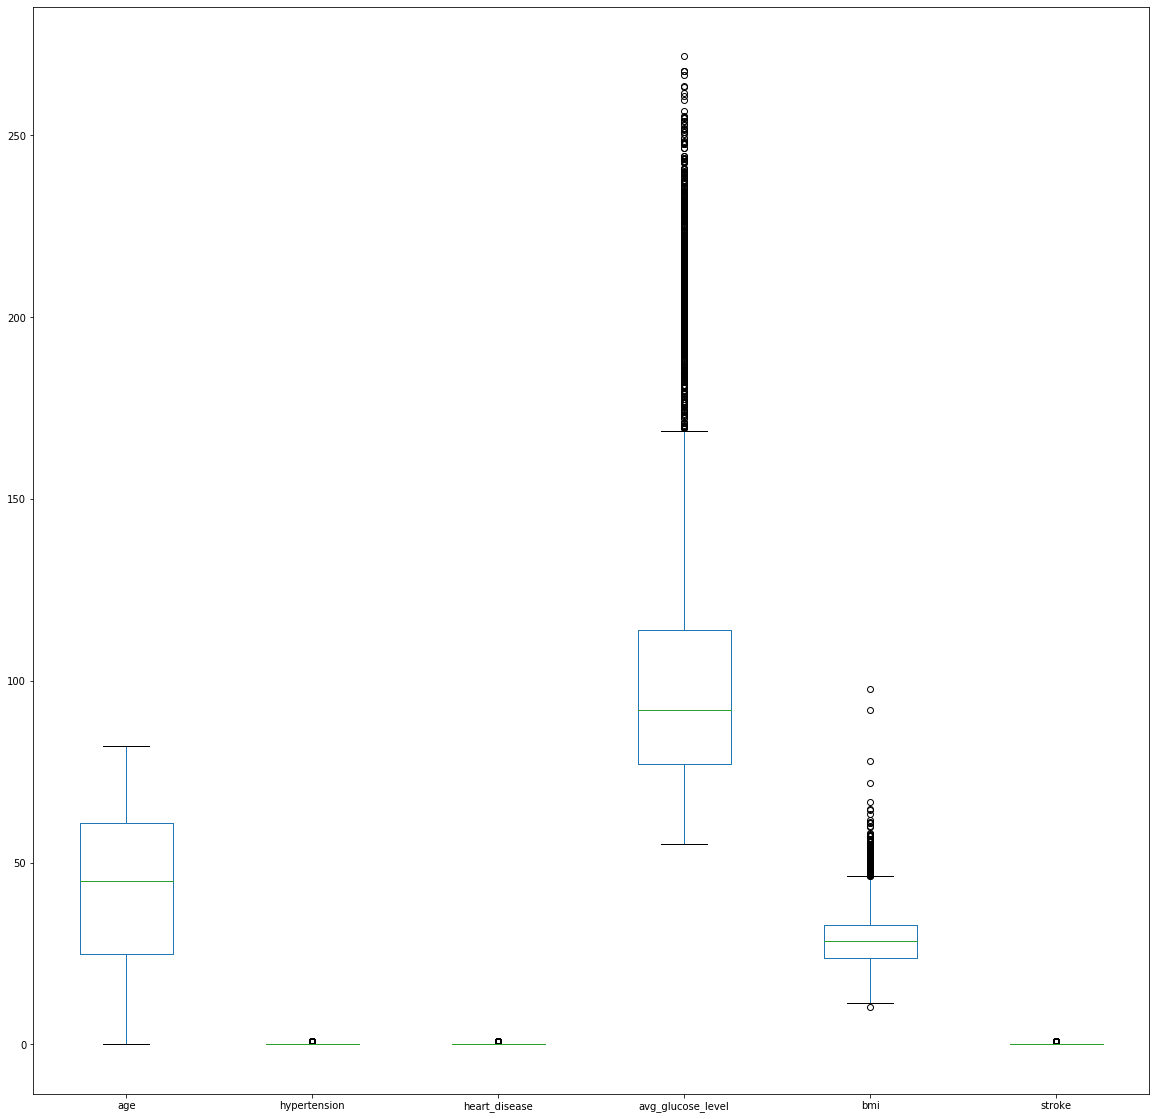

In [203]:
data.plot(kind='box')
plt.show()


# average glucose level

In [204]:
data['avg_glucose_level'].describe

<bound method NDFrame.describe of 0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5110, dtype: float64>

In [205]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [206]:
data[data['avg_glucose_level']>114.09000]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.800000,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


In [207]:
data['avg_glucose_level'].value_counts()

93.88     6
83.16     5
91.85     5
91.68     5
73.00     5
         ..
162.14    1
111.77    1
90.91     1
103.50    1
88.02     1
Name: avg_glucose_level, Length: 3979, dtype: int64

# Lebel Encoding

In [208]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [210]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [211]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [212]:
gender=enc.fit_transform(data['gender'])

In [213]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [214]:
Residence_type=enc.fit_transform(data['Residence_type'])

In [215]:
work_type=enc.fit_transform(data['work_type'])

In [216]:
ever_married=enc.fit_transform(data['ever_married'])

In [217]:
gender

array([1, 0, 1, ..., 0, 1, 0])

In [218]:
smoking_status

array([1, 2, 2, ..., 2, 1, 0])

In [219]:
Residence_type

array([1, 0, 0, ..., 0, 0, 1])

In [220]:
work_type

array([2, 3, 2, ..., 3, 2, 0])

In [221]:
ever_married

array([1, 1, 1, ..., 1, 1, 1])

In [222]:
data['gender']=gender

In [223]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,0,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,0,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,1,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [224]:
data['smoking_status']=smoking_status

In [225]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.600000,1,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,2,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.500000,2,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.400000,3,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,Yes,Private,Urban,83.75,28.893237,2,0
5106,0,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,2,0
5107,0,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,2,0
5108,1,51.0,0,0,Yes,Private,Rural,166.29,25.600000,1,0


In [226]:
data['Residence_type']=Residence_type

In [227]:
data['work_type']=work_type

In [228]:
data['ever_married']=ever_married

In [229]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
gender               5110 non-null int32
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null int32
work_type            5110 non-null int32
Residence_type       5110 non-null int32
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null float64
smoking_status       5110 non-null int32
stroke               5110 non-null int64
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


# Splitting data for train and test

X --- train_x,test_x    80/20         
Y --- train_y,test_y    

In [231]:
X = data.drop('stroke',axis=1)

In [232]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [233]:
Y=data['stroke']

In [234]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=None)

In [236]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3560,0,1.32,0,0,0,4,0,110.17,20.3,0
3320,1,60.00,0,0,1,3,1,69.53,26.2,2
4519,1,44.00,0,0,1,0,1,101.66,35.4,2
2162,0,47.00,0,0,1,0,1,122.32,23.9,0
4667,0,24.00,0,0,1,2,0,156.43,27.0,1
...,...,...,...,...,...,...,...,...,...,...
4037,0,54.00,0,0,1,2,1,219.67,29.4,3
4143,0,47.00,0,0,1,2,0,115.98,27.6,0
1671,0,65.00,0,0,1,2,1,84.75,21.4,0
2573,0,24.00,0,0,0,2,1,86.35,32.7,2


In [237]:
Y_train

3560    0
3320    0
4519    0
2162    0
4667    0
       ..
4037    0
4143    0
1671    0
2573    0
4157    0
Name: stroke, Length: 4088, dtype: int64

In [238]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


# normalization

In [239]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [240]:
X_train_std=std.fit_transform(X_train)

In [241]:
X_test_std=std.fit_transform(X_test)

In [242]:
X_train_std

array([[-0.83653677, -1.85078526, -0.32841906, ...,  0.08267194,
        -1.10914917, -1.28643101],
       [ 1.19299577,  0.74566929, -0.32841906, ..., -0.81402421,
        -0.35290435,  0.58009249],
       [ 1.19299577,  0.03770622, -0.32841906, ..., -0.10509588,
         0.82632485,  0.58009249],
       ...,
       [-0.83653677,  0.96690774, -0.32841906, ..., -0.47820444,
        -0.96815437, -1.28643101],
       [-0.83653677, -0.84724761, -0.32841906, ..., -0.44290144,
         0.48024671,  0.58009249],
       [-0.83653677, -1.28972453, -0.32841906, ...,  0.11775429,
        -0.53235228, -1.28643101]])

In [243]:
X_test_std

array([[-0.85568884, -1.78998579, -0.32933246, ..., -0.69428501,
        -1.74297074, -1.27986842],
       [ 1.16864911,  0.46175071, -0.32933246, ...,  0.21211045,
         1.57680037, -0.34623136],
       [-0.85568884, -0.28882813, -0.32933246, ..., -0.64349848,
         0.62632648,  0.58740571],
       ...,
       [ 1.16864911, -0.86280017, -0.32933246, ..., -0.11966533,
         2.98184872,  0.58740571],
       [-0.85568884,  1.07987445, -0.32933246, ..., -0.18398015,
        -0.03487274, -0.34623136],
       [ 1.16864911,  0.5500541 , -0.32933246, ..., -0.50555427,
         0.25440192, -0.34623136]])

# ##Training

# Decision Tree

In [244]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [245]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [246]:
dt.feature_importances_

array([0.02865968, 0.20588796, 0.03527132, 0.02219013, 0.01142974,
       0.02331882, 0.026508  , 0.29726305, 0.24394482, 0.10552649])

In [247]:
X_train.columns     

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [248]:
# on above 2 cell we can say  glucose level , bmi and age is more important than other

In [249]:
#predict

In [250]:
Y_pred=dt.predict(X_test_std)

In [251]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [252]:
Y_test

282     0
3126    0
4516    0
4147    0
4619    0
       ..
811     0
3975    0
3541    0
5002    0
3227    0
Name: stroke, Length: 1022, dtype: int64

In [253]:

from sklearn.metrics import accuracy_score


In [254]:
DT_ac=accuracy_score(Y_test,Y_pred)

In [255]:
DT_ac

0.9217221135029354

# #Logistic Regreassion

In [256]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [257]:
lr.fit(X_train_std,Y_train)

C:\Users\KR. ARMAAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [296]:
Y_pred_lr=lr.predict(X_test_std)

In [297]:
Y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [260]:
Y_test

282     0
3126    0
4516    0
4147    0
4619    0
       ..
811     0
3975    0
3541    0
5002    0
3227    0
Name: stroke, Length: 1022, dtype: int64

In [261]:
LG_ac=accuracy_score(Y_test,Y_pred)

In [262]:
LG_ac

0.9510763209393346

# KNN

In [263]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [264]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [265]:
Y_pred=knn.predict(X_test_std)

In [266]:
KNN_ac=accuracy_score(Y_test,Y_pred)

In [267]:
KNN_ac

0.9500978473581213

# #Random Forest

In [268]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [269]:
rf.fit(X_train_std,Y_train)

C:\Users\KR. ARMAAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [270]:
Y_pred=rf.predict(X_test_std)

In [271]:
RF_ac=accuracy_score(Y_test,Y_pred)

In [272]:
RF_ac

0.9500978473581213

In [273]:
KNN_ac

0.9500978473581213

In [274]:
DT_ac

0.9217221135029354

In [275]:
LG_ac

0.9510763209393346

In [276]:
##SVM

In [277]:
from sklearn.svm import SVC

In [278]:
sv=SVC()

In [279]:
sv.fit(X_train_std,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [280]:
Y_prec=sv.predict(X_test)

In [282]:
SVM_ac=accuracy_score(Y_test,Y_prec)

In [283]:
SVM_ac

0.9510763209393346

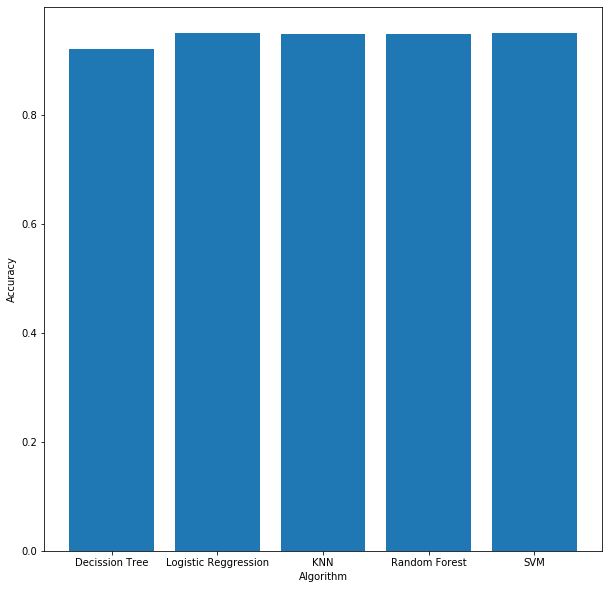

In [295]:
plt.bar(['Decission Tree','Logistic Reggression','KNN','Random Forest','SVM'],[DT_ac,LG_ac,KNN_ac,RF_ac,SVM_ac])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()

In [298]:
import pickle
filename=r'C:\Users\KR. ARMAAN\Desktop\Python\STROKE DETECTION\final_model_lr.sav'
pickle.dump(lr,open(filename,'wb'))